In [6]:
from binance import Client
import pandas as pd
import getpass
import matplotlib
import pandas_bokeh
import plotly.graph_objects as go

In [20]:
%store -r api_key api_secret
#use .env file for credentials

In [19]:
api_key = getpass.getpass()
api_secret = getpass.getpass()

hide


In [21]:
client = Client(api_key, api_secret)


In [22]:
client.get_account()

BinanceAPIException: APIError(code=-2015): Invalid API-key, IP, or permissions for action.

In [11]:
def get_historical_data(symbol, interval, lookback):
    frame = pd.DataFrame(client.get_historical_klines(symbol, interval, lookback+'min ago UTC+5:30'))
    no_of_trades = frame.iloc[:, 9]
    volume = frame.iloc[:, 5:6]
    frame = frame.iloc[:, :5]
    frame.columns = ['Time', 'Open', 'High', 'Low', 'Close']
    #frame['No of trades'] = no_of_trades
    frame = frame.set_index('Time')
    frame.index = pd.to_datetime(frame.index, unit='ms')
    volume.index = pd.to_datetime(frame.index, unit='ms')
    volume.columns = ['Volume']
    frame = frame.astype(float)
    volume = volume.astype(float)
    return frame, volume

In [12]:
test, volume = get_historical_data('SHIBUSDT', '1m', '60')
test

,Open,High,Low,Close
Time,,,,
2021-11-24 08:08:00,0.000039,0.000039,0.000039,0.000039
2021-11-24 08:09:00,0.000039,0.000039,0.000039,0.000039
2021-11-24 08:10:00,0.000039,0.000039,0.000039,0.000039
2021-11-24 08:11:00,0.000039,0.000039,0.000039,0.000039
2021-11-24 08:12:00,0.000039,0.000039,0.000039,0.000039
2021-11-24 08:13:00,0.000039,0.000039,0.000039,0.000039
2021-11-24 08:14:00,0.000039,0.000039,0.000039,0.000039
2021-11-24 08:15:00,0.000039,0.000039,0.000039,0.000039
2021-11-24 08:16:00,0.000039,0.000039,0.000039,0.000039


<AxesSubplot:xlabel='Time'>

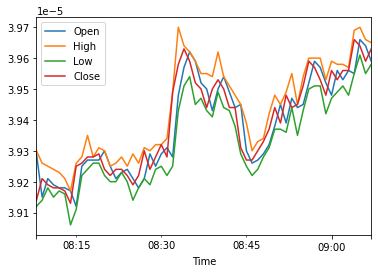

In [13]:
test.plot()

<AxesSubplot:xlabel='Time'>

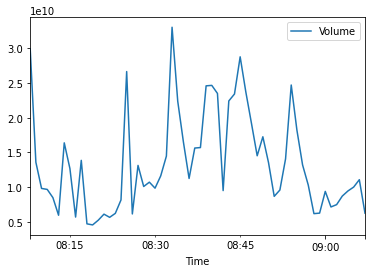

In [14]:
volume.plot()

In [15]:
fig = go.Figure(data=[go.Candlestick(x=test.index, open=test.Open, high=test.High, low=test.Low, close=test.Close)])
#fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_layout(yaxis_title="Price ($)", xaxis_title="Time (mins)")
fig.show()

In [ ]:
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [ ]:
test.plot_bokeh()

Figure(id='2029', ...)

In [ ]:
def sample_strategy(coin_symbol, qty, entried=False):
    df = get_historical_data(coin_symbol, '1m', '30')
    df=df[0]
    cumulative_return = (df.Open.pct_change() +1).cumprod() - 1
    if not entried:
        #Haven't bought the asset yet
        if cumulative_return[-1] < -0.002: #<-0.2%
            order = client.create_order(symbol=coin_symbol, side='BUY', type='MARKET', quantity=qty)

            print(order)
            entried=True
        else:
            print("No trade has been executed as per current strategy\n")
    if entried:
        #order has been placed
        while True:
            df = get_historical_data(coin_symbol, '1m', '30')
            df=df[0]
            since_buy = df.loc[df.index > pd.to_datetime(order['transactTime'], unit='ms')]
            if len(since_buy) > 0: #handling case when since buy data frame is empty (the very first moment for example)
                since_buy_return = (since_buy.Open.pct_change() +1).cumprod() - 1

                if since_buy_return[-1] > 0.0025 or since_buy_return[-1]<-0.0015:
                    order = client.create_order(symbol=coin_symbol, side='SELL', type='MARKET', quantity=qty)
                    print(order)
                    break
#Golden Cross

In [16]:
sample_strategy("SHIBUSDT", 0.00001, False)

NameError: name 'sample_strategy' is not defined